In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


DATA PREPROCESSING

CHECK NULL VALUES



In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
df['Gender']=pd.DataFrame(le.fit_transform(df['Gender']))
df['Occupation']=pd.DataFrame(le.fit_transform(df['Occupation']))
df['BMI Category']=pd.DataFrame(le.fit_transform(df['BMI Category']))
df['Sleep Disorder']=pd.DataFrame(le.fit_transform(df['Sleep Disorder']))


In [14]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,2
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,1


In [15]:
df.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,1.379679
std,108.108742,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,0.805620
min,1.000000,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000
25%,94.250000,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,1.000000
50%,187.500000,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,2.000000
75%,280.750000,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,2.000000
max,374.000000,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,2.000000


SCALING

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
df[['Age', 'Physical Activity Level', 'Daily Steps']] = scaler.fit_transform(df[['Age', 'Physical Activity Level', 'Daily Steps']])


In [19]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,0.00000,9,6.1,6,0.2,6,3,126/83,77,0.171429,2
1,2,1,0.03125,1,6.2,6,0.5,8,0,125/80,75,1.000000,2
2,3,1,0.03125,1,6.2,6,0.5,8,0,125/80,75,1.000000,2
3,4,1,0.03125,6,5.9,4,0.0,8,2,140/90,85,0.000000,1
4,5,1,0.03125,6,5.9,4,0.0,8,2,140/90,85,0.000000,1


CATEGORIZING SLEEP QUALITY AS GOOD AND BAD

In [20]:
X = df[['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 
        'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]
y = df['Quality of Sleep']  
y = y.apply(lambda x: "Bad" if x <= 5 else "Good")
y = le.fit_transform(y)

MODEL TRAINING AND EVALUATION

SPLITTING DATA INTO TRAINING AND TESTING

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

MODEL SELECTION

In [26]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\parek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=model.predict(X_test)

MODEL EVALUATION

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")


recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9733
Precision: 0.9861
Recall: 0.9861
F1-Score: 0.9861


In [49]:
new_data = np.array([[35, 2, 7, 60, 5, 1, 72, 5000, 1]]) 
new_data[:, [0, 3, 7]] = scaler.transform(new_data[:, [0, 3, 7]]) 
prediction = model.predict(new_data)
print("Predicted Sleep Quality:", prediction[0])

Predicted Sleep Quality: 1


C:\Users\parek\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\parek\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


SAVING MODEL USING JOBLIB

In [52]:
import joblib

joblib.dump(model, "sleep_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

DATA VISUALIZATION

HISTOGRAM

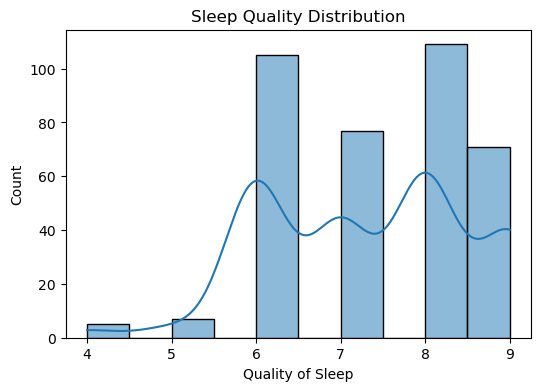

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Quality of Sleep'], bins=10, kde=True)
plt.title("Sleep Quality Distribution")
plt.xlabel("Quality of Sleep")
plt.ylabel("Count")
plt.show()

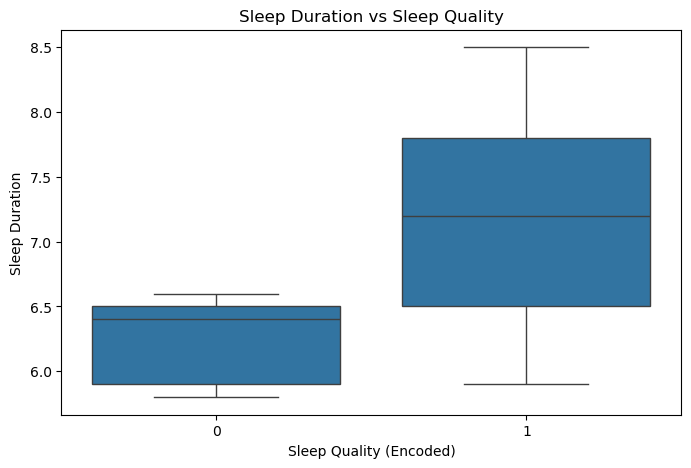

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df["Sleep Duration"])
plt.title("Sleep Duration vs Sleep Quality")
plt.xlabel("Sleep Quality (Encoded)")
plt.ylabel("Sleep Duration")
plt.show()

CONFUSION MATRIX

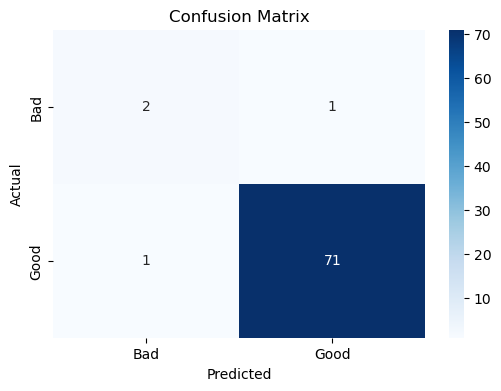

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()